<h3> Overview of Problem Statement </h3>

<p>The <b>S&P 500 </b> is a stock market index that measures the stock 
performance of 500 large companies listed on stock exchanges in the United Stated</p>
<p>Some questions that arise of analysis that can we do on this stock data:
<li>Analysing Daily Return</li>
<li>Comparing Prices of Stocks (compare prices of the stuff, each of the stock company data) </li>
<li>Analyse the Total Volumn of Stock being Traded Each Day</li>
<li>Analyse Daily Price Change in Stock</li>
<li>Analyse Montly Mean of Close Feature</li>
<li>Analyse whether Stock Prices of These Tech Companies (Apple, Amazon, Google, and Microsoft) are correlated or not </li>
<li>Analyse Daily Return of Each Stock & How they are co-related </li>
<li>Value at Risk Analysis for Tech Companies </li> </p>

<p>Datasets that will be used are Apple dataset, Amazon dataset, Microsoft dataset, and Google dataset.</p>

In [1]:
#import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#combine four datasets
path = 'E:\BELAJAR DATA\Real Project -DA\Stock Market\individual_stocks_5yr'
company_list = ['AAPL_data.csv', 'AMZN_data.csv', 'GOOG_data.csv', 'MSFT_data.csv']
all_data = pd.DataFrame()
for file in company_list:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])
all_data.shape


(4752, 7)

In [3]:
#show the first 10 rows
all_data.head(10) 

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


In [4]:
#check the data types of dataframe
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [5]:
#change the data type of date column
all_data['date'] = all_data['date'].astype('datetime64[ns]')
#all_data['date'] = pd.to_datetime(all_data['date'])

In [6]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [7]:
#check the missing value 
all_data.info()
# all_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4752 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4752 non-null   datetime64[ns]
 1   open    4752 non-null   float64       
 2   high    4752 non-null   float64       
 3   low     4752 non-null   float64       
 4   close   4752 non-null   float64       
 5   volume  4752 non-null   int64         
 6   Name    4752 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 278.4+ KB


In [8]:
comp_list = all_data['Name'].unique()
comp_list

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

#### Analyse Closing Price of all The Stocks

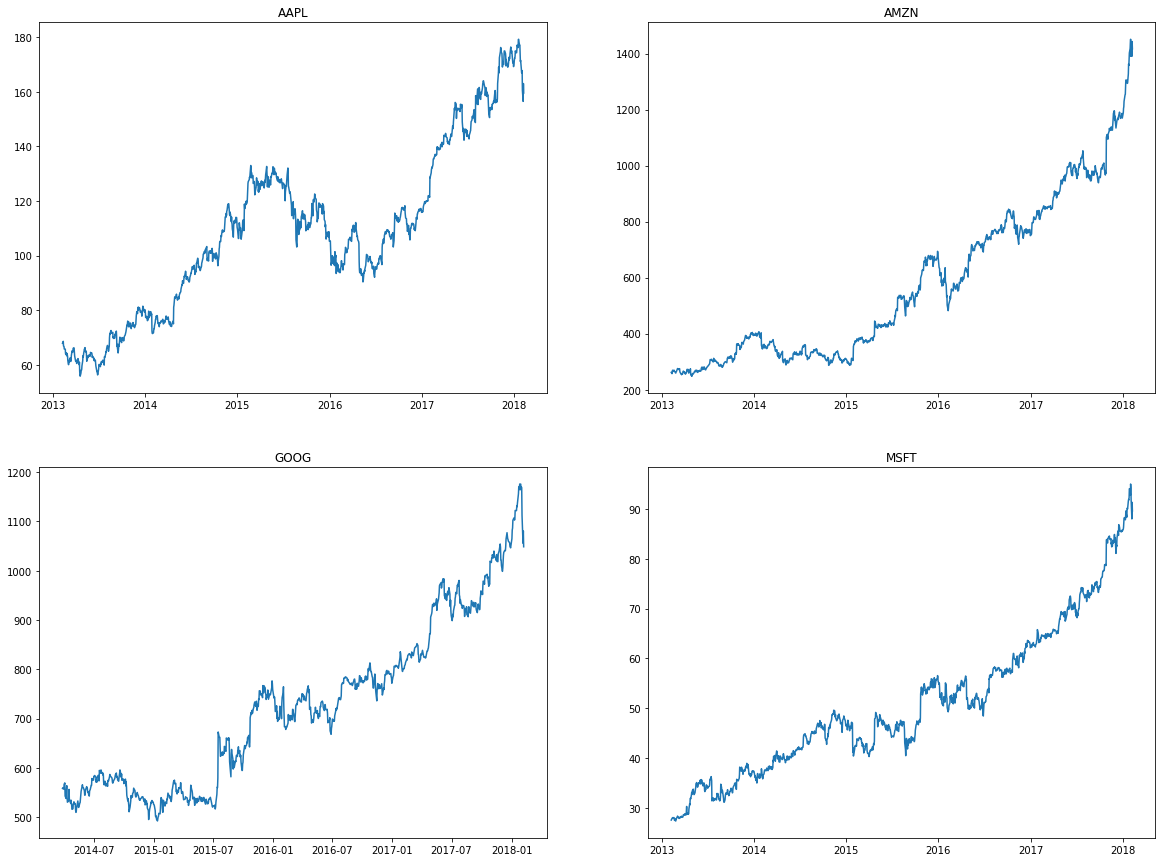

In [9]:
# i for index
plt.figure(figsize=(20,15))
for i, company in enumerate(comp_list,1):
    plt.subplot(2,2,i)
    df = all_data[all_data['Name'] == company]
    #plt.xticks(rotation = 'vertical') #x axis in vertical
    plt.plot(df['date'], df['close']) #date feature as x axis, close feature as y axis
    plt.title(company)


 Conclusion: 
 <p>Every year, the closing price of each stock grew. However, after a downward trend in the closing price of Apple stock at the end of 2016, it resumed an upward trend in 2017. </p>


#### Analyse the Total Volumn of Stock being Traded Each Day

In [10]:
import plotly.express as px

In [11]:
for company in comp_list:
    df = all_data[all_data['Name']==company]
    fig = px.line(df, x='date', y='volume', title=company, width=1000)
    fig.show()

In [12]:
# Ascending the total volume traded by each day
df_ap = all_data[all_data['Name'] == 'MSFT']
df_ap.set_index('date', inplace=True)
df_ap['volume'].sort_values(ascending=True)

date
2017-11-24      7425603
2016-11-25      8409616
2015-11-27      9009132
2015-12-24      9570002
2017-12-26      9891237
                ...    
2013-09-03    154489546
2015-01-27    169163953
2014-09-19    202526536
2013-08-23    225442537
2013-07-19    248354245
Name: volume, Length: 1259, dtype: int64

Conclusion
<p>After analysing the total volume of stock traded in each day, we might take conclusion:</p>
<li>Appel</li>
<p>The biggest volume of shares traded was 266.8335 million in January 28, 2014, and the lowest volume was 11.47592 million in November 11, 2016. </p>
<li>Amazon</li>
<p>The biggest volume of shares traded was 23.85606 million in January 30, 2015, and the lowest volume was 1.09207 million in December 24 2015. </p>
<li>Google</li>
<p>The biggest volume of shares traded was 11.16494 millioN in July 17, 2015, and the lowest volume was 7932 in April 1, 2014. 
</p>
<li>Microsoft</li>
<p>The biggest volume of shares traded was 248.3542 million in July 19, 2013, and the lowest volume was 7.425603 million in November 24 2017. 
</p>

#### Analyse Daily Price Change in Stock

In [13]:
all_data['Daily_Price_change'] = all_data['close'] - all_data['open']

In [14]:
all_data.tail()

,date,open,high,low,close,volume,Name,Daily_Price_change
1254,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,-0.53
1255,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,-1.86
1256,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,-2.56
1257,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,4.44
1258,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,-0.88


In [15]:
all_data['% daily return'] = (all_data['Daily_Price_change']/all_data['close'])*100


In [18]:
all_data.head()

,date,open,high,low,close,volume,Name,Daily_Price_change,% daily return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [17]:
for company in comp_list:
    df = all_data[all_data['Name'] == company]
    fig = px.line(df, x='date', y='% daily return', title=company, hover_data=['Daily_Price_change'], width=1200, height=500)
    fig.show()


Conclusion:
<p>Here are some conclusion after analysing daily price change in stocks:</p>
<li>Appel</li>
    <p>The biggest daily price change of stock was 8.25 on August 24, 2015, and the lowest daily price change of stock was -7.37 on August 25, 2015. </p>
<li>Amazon</li>
<p>The biggest daily price change of stock was 81.38 on February 6, 2018, and the lowest daily price change of stock was -49.570 on July 24, 2015.</p>
<li>Google</li>
<p>The biggest daily price change of stock was 53.420 on February 6, 2018, and the lowest daily price change of stock was -43.270 on February 3, 2016.</p>
<li>Microsoft</li>
<p>The biggest daily price change of stock was 4.40 on February 6, 2018, and the lowest daily price change of stock was -43.270 on August 21, 2015.</p>

##### Analyse Montly Mean of Close Feature

In [19]:
df_aapl = pd.read_csv(
    'E:\BELAJAR DATA\Real Project -DA\Stock Market\individual_stocks_5yr\AAPL_data.csv')


In [20]:
df_aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [21]:
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 59.1+ KB


In [22]:
#change data type of date column
df_aapl['date'] = pd.to_datetime(df_aapl['date'])

In [23]:
df_aapl.set_index('date', inplace=True)

In [24]:
df_aapl.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [74]:
#df_aapl.reset_index(inplace=True)

In [25]:
#use resample method to resample the time series data based on months.
# W for weekly frequency, M for month end frequency,
# SM for semi month end frequency
# Q for quarter end frequency
df_aapl['close'].resample('M').mean().sort_values()

date
2013-04-30     59.966432
2013-06-30     60.791120
2013-07-31     61.308064
2013-03-31     63.120110
2013-05-31     63.778927
                 ...    
2017-08-31    159.392609
2018-02-28    161.468000
2017-12-31    171.891500
2017-11-30    172.406190
2018-01-31    174.005238
Name: close, Length: 61, dtype: float64

In [26]:
fig = px.line(df_aapl['close'].resample('M').mean(), width=800, height=400)
fig.show()

there was downward trend in May 2015 until in May 2016, however the price increased on july 2016 rapidly.

In [27]:
df_aapl['close'].resample('Y').mean().sort_values()

date
2013-12-31     67.237839
2014-12-31     92.264531
2016-12-31    104.604008
2015-12-31    120.039861
2017-12-31    150.585080
2018-12-31    171.594231
Name: close, dtype: float64

<AxesSubplot:xlabel='date'>

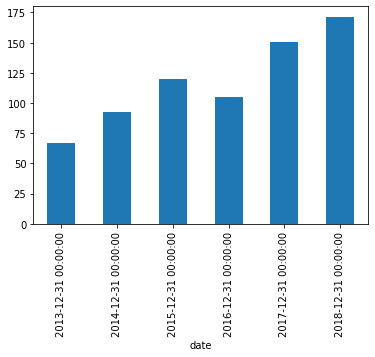

In [28]:
#create bar chart to visualize the data baseod on the year
df_aapl['close'].resample('Y').mean().plot(kind='bar')
#plt.xticks(rotation= -85)


In [29]:
df_amzn = pd.read_csv(
    'E:\BELAJAR DATA\Real Project -DA\Stock Market\individual_stocks_5yr\AMZN_data.csv')


In [30]:
df_amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [31]:
df_amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 59.1+ KB


In [32]:
df_amzn['date'] = df_amzn['date'].astype('datetime64[ns]')

In [33]:
df_amzn.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [34]:
df_amzn.set_index('date', inplace=True)

In [35]:
df_amzn.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [36]:
df_amzn['close'].resample('M').mean()

date
2013-02-28     263.995000
2013-03-31     265.758400
2013-04-30     263.072364
2013-05-31     262.727727
2013-06-30     274.101900
                 ...     
2017-10-31    1000.720000
2017-11-30    1139.808095
2017-12-31    1168.841500
2018-01-31    1309.010952
2018-02-28    1413.914000
Freq: M, Name: close, Length: 61, dtype: float64

In [37]:
fig = px.line(df_amzn['close'].resample('M').mean(), width=800, height=400)
fig.show()

there was little downward trend in April 2015 until in January 2015, however the price increased on February 2015 rapidly.

In [63]:
#df_amzn['close'].resample('M').mean().plot()

In [38]:
df_amzn['close'].resample('Y').mean()

date
2013-12-31     301.564912
2014-12-31     332.550976
2015-12-31     478.138194
2016-12-31     699.523135
2017-12-31     968.151394
2018-12-31    1329.184615
Freq: A-DEC, Name: close, dtype: float64

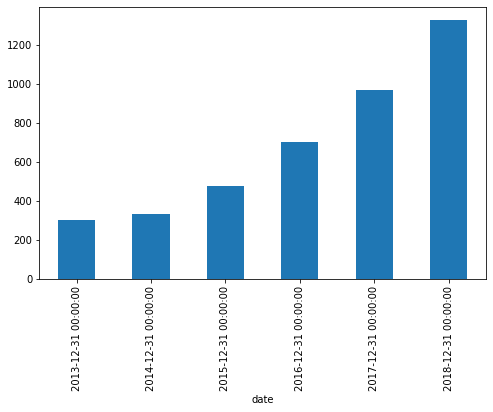

In [39]:
plt.figure(figsize=(8,5))
df_amzn['close'].resample('Y').mean().plot(kind='bar')
plt.show()

In [40]:
df_goog = pd.read_csv('E:\BELAJAR DATA\Real Project -DA\Stock Market\individual_stocks_5yr\GOOG_data.csv')

In [41]:
df_goog.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [42]:
df_goog.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [43]:
#change the data type of date column
df_goog['date'] = pd.to_datetime(df_goog['date'])

In [44]:
df_goog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    975 non-null    datetime64[ns]
 1   open    975 non-null    float64       
 2   high    975 non-null    float64       
 3   low     975 non-null    float64       
 4   close   975 non-null    float64       
 5   volume  975 non-null    int64         
 6   Name    975 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 49.6+ KB


In [45]:
df_goog.set_index('date', inplace=True)

In [46]:
df_goog.head()

,open,high,low,close,volume,Name
date,,,,,,
2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [47]:
df_goog['close'].resample('M').mean()

date
2014-03-31     558.473333
2014-04-30     540.028571
2014-05-31     534.053333
2014-06-30     558.430476
2014-07-31     584.015677
2014-08-31     573.600667
2014-09-30     581.889048
2014-10-31     547.030000
2014-11-30     542.977895
2014-12-31     524.626818
2015-01-31     512.418000
2015-02-28     537.992105
2015-03-31     559.716364
2015-04-30     540.498095
2015-05-31     535.239000
2015-06-30     532.915909
2015-07-31     590.093636
2015-08-31     636.838095
2015-09-30     617.934762
2015-10-31     663.592727
2015-11-30     735.388500
2015-12-31     755.354545
2016-01-31     718.495789
2016-02-29     702.689000
2016-03-31     727.056818
2016-04-30     736.833810
2016-05-31     712.182857
2016-06-30     706.486364
2016-07-31     725.696500
2016-08-31     775.793478
2016-09-30     773.619524
2016-10-31     788.452381
2016-11-30     766.640952
2016-12-31     782.171429
2017-01-31     807.904750
2017-02-28     816.916579
2017-03-31     834.111304
2017-04-30     844.056842
2017-05

In [48]:
fig = px.line(df_goog['close'].resample('M').mean(), width=800, height=400)
#fig.update_layout(margin=dict(l=20, r=20, t=20, b=20), paper_bgcolor='gray')
fig.show()


the montly mean close price increased rapidly .

In [49]:
df_goog['close'].resample('M').mean().sort_values()


date
2015-01-31     512.418000
2014-12-31     524.626818
2015-06-30     532.915909
2014-05-31     534.053333
2015-05-31     535.239000
2015-02-28     537.992105
2014-04-30     540.028571
2015-04-30     540.498095
2014-11-30     542.977895
2014-10-31     547.030000
2014-06-30     558.430476
2014-03-31     558.473333
2015-03-31     559.716364
2014-08-31     573.600667
2014-09-30     581.889048
2014-07-31     584.015677
2015-07-31     590.093636
2015-09-30     617.934762
2015-08-31     636.838095
2015-10-31     663.592727
2016-02-29     702.689000
2016-06-30     706.486364
2016-05-31     712.182857
2016-01-31     718.495789
2016-07-31     725.696500
2016-03-31     727.056818
2015-11-30     735.388500
2016-04-30     736.833810
2015-12-31     755.354545
2016-11-30     766.640952
2016-09-30     773.619524
2016-08-31     775.793478
2016-12-31     782.171429
2016-10-31     788.452381
2017-01-31     807.904750
2017-02-28     816.916579
2017-03-31     834.111304
2017-04-30     844.056842
2017-08

In [50]:
df_goog['close'].resample('Y').mean()

date
2014-12-31     554.184891
2015-12-31     602.461349
2016-12-31     743.485119
2017-12-31     921.781394
2018-12-31    1123.490769
Freq: A-DEC, Name: close, dtype: float64

<AxesSubplot:xlabel='date'>

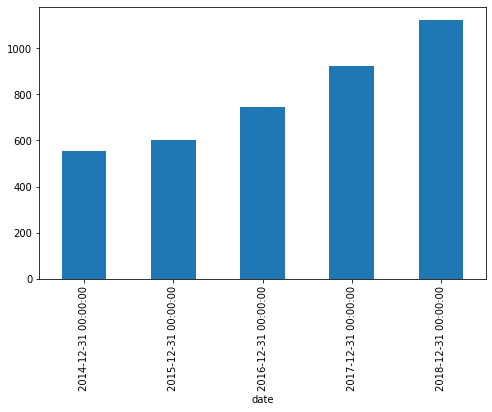

In [51]:
plt.figure(figsize=(8,5))
df_goog['close'].resample('Y').mean().plot(kind='bar')
#fig = px.bar(df_goog['close'].resample('Y').mean())
#fig.update_layout(autosize=False, width=500, height=400)
#fig.show()

In [52]:
df_msft = pd.read_csv(
    'E:\BELAJAR DATA\Real Project -DA\Stock Market\individual_stocks_5yr\MSFT_data.csv')

In [53]:
df_msft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [54]:
df_msft.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [55]:
df_msft['date'] = pd.to_datetime(df['date'])

In [56]:
df_msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 64.0+ KB


In [57]:
df_msft.set_index('date', inplace=True)

In [58]:
df_msft.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [59]:
df_msft['close'].resample('M').mean()

date
2013-02-28    27.777500
2013-03-31    28.139500
2013-04-30    29.870000
2013-05-31    33.950636
2013-06-30    34.632000
                ...    
2017-10-31    77.939545
2017-11-30    83.717619
2017-12-31    84.758500
2018-01-31    90.075238
2018-02-28    90.996000
Freq: M, Name: close, Length: 61, dtype: float64

In [59]:
fig = px.line(df_msft['close'].resample('M').mean(), width=800, height=400)
fig.show()

ggg

In [60]:
df_msft['close'].resample('Y').mean()

date
2013-12-31    33.090270
2014-12-31    42.453343
2015-12-31    46.713810
2016-12-31    55.259306
2017-12-31    71.984024
2018-12-31    90.252308
Freq: A-DEC, Name: close, dtype: float64

<AxesSubplot:xlabel='date'>

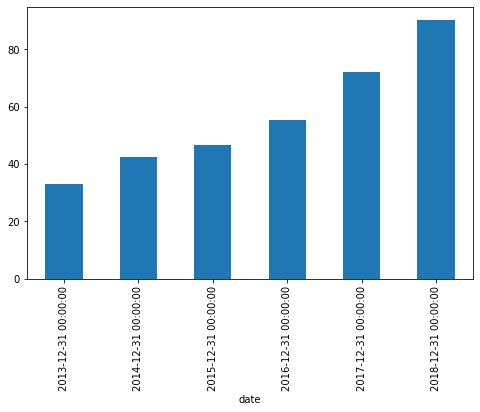

In [61]:
plt.figure(figsize=(8,5))
df_msft['close'].resample('Y').mean().plot(kind='bar')

Conclusion --
The average closing price each stock can be concluded:

#### Analyse whether Stock Prices of These Tech Companies (Apple, Amazon, Google, and Microsoft) are correlated or not

In [62]:
#reset index for each dataset
df_aapl.reset_index(inplace=True)
df_amzn.reset_index(inplace=True)
df_goog.reset_index(inplace=True)
df_msft.reset_index(inplace=True)

In [63]:
# create a blank dataframe
df_tech = pd.DataFrame()

In [64]:
df_tech['aapl'] = df_aapl['close']
df_tech['amzn'] = df_amzn['close']
df_tech['goog'] = df_goog['close']
df_tech['msft'] = df_msft['close']

In [65]:
df_tech['aapl'].head()

0    67.8542
1    68.5614
2    66.8428
3    66.7156
4    66.6556
Name: aapl, dtype: float64

In [66]:
df_tech.head()

,aapl,amzn,goog,msft
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04


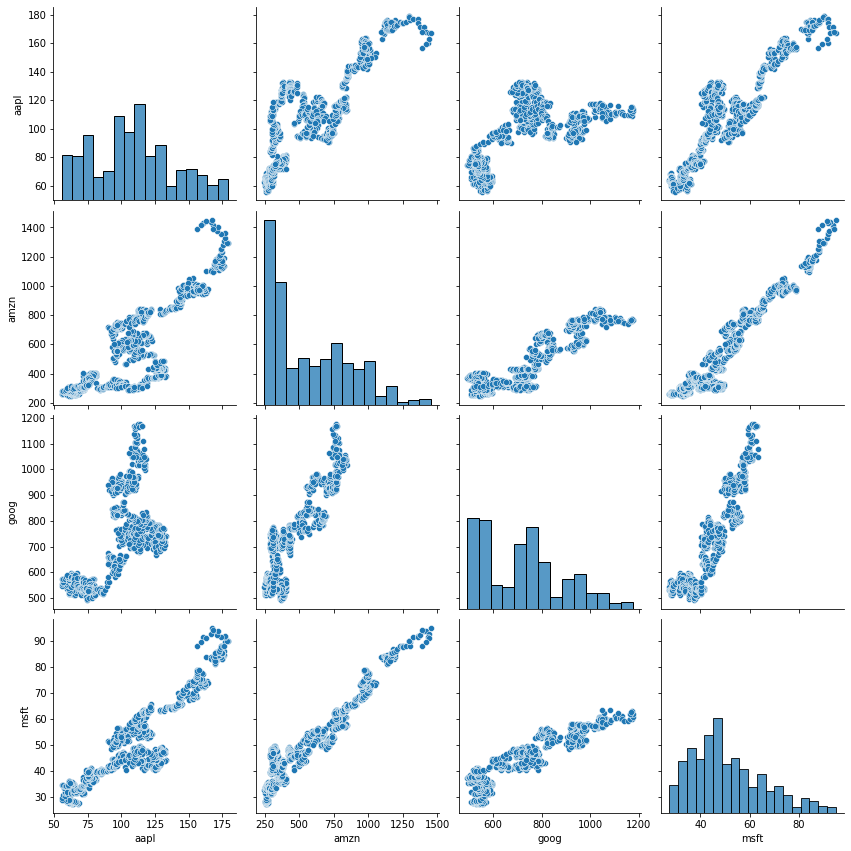

In [67]:
sns.pairplot(data=df_tech, height=3)

conclusion 
<p>if amazon prices were increasing (the closing price of amazon stocks increasing), it would make Microsoft stocks are also increasing. </p>

<AxesSubplot:>

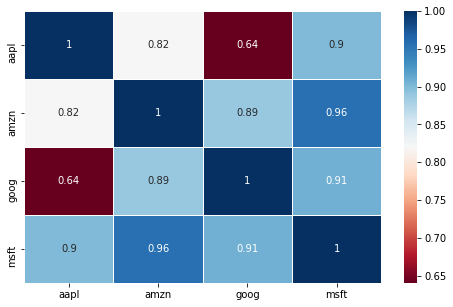

In [68]:
plt.figure(figsize=(8,5))
sns.heatmap(df_tech.corr(), annot=True, linewidths=.5, cmap='RdBu')
#plt.show()

Microsoft and Google had very strong possitive relationship. If amazon prices increased it would also make microsoft increase. 
so did microsoft and apel, amazon and appel.

#### Analyse Daily Return of Each Stock & How they are co-related

In [69]:
#create a blank dataframe
data = pd.DataFrame()

In [70]:
df_aapl.head()
#df_amzn.head()
#df_goog.head()
#df_msft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [71]:
#create features from each dataset as percentage daily return
data['aapl_change'] = ((df_aapl['close']-df_aapl['open'])/df_aapl['close'])*100
data['amzn_change'] = ((df_amzn['close']-df_amzn['open'])/df_amzn['close'])*100
data['goog_change'] = ((df_goog['close']-df_goog['open'])/df_goog['close'])*100
data['msft_change'] = ((df_msft['close']-df_msft['open'])/df_msft['close'])*100

In [72]:
data.head()

,aapl_change,amzn_change,goog_change,msft_change
0,0.206325,0.209964,-1.708269,0.725953
1,0.714688,-2.328836,-0.216075,0.753769
2,-2.481344,-0.189409,-1.781065,0.000000
3,-0.042869,2.946525,1.489879,0.356761
4,0.443624,0.694548,0.334039,0.427960


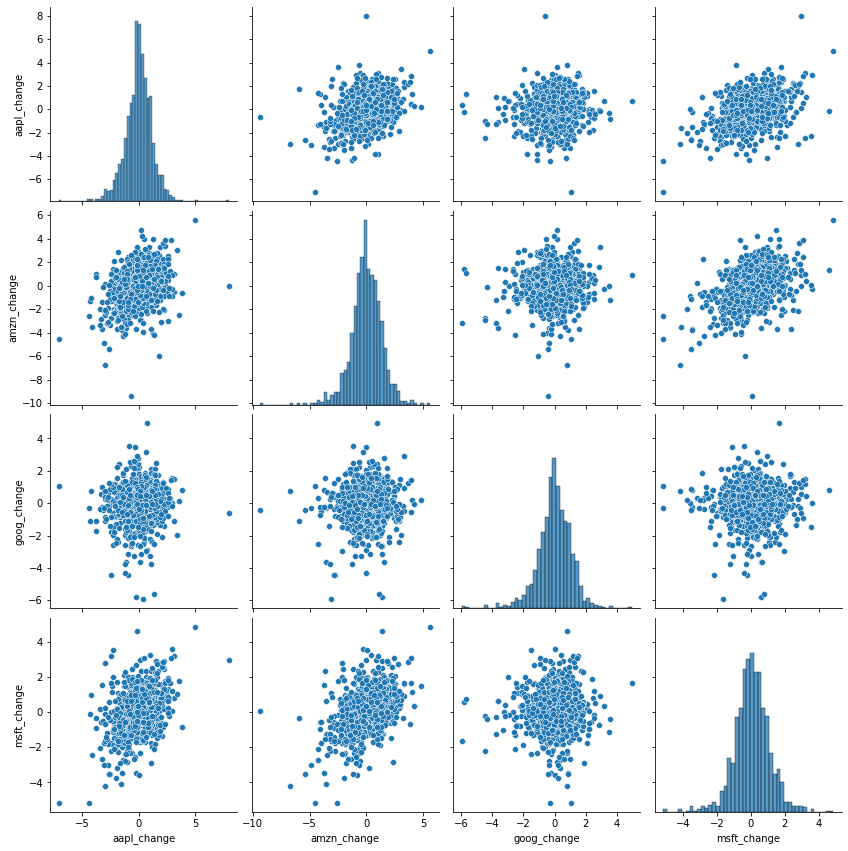

In [73]:
sns.pairplot(data=data, height=3)

<AxesSubplot:>

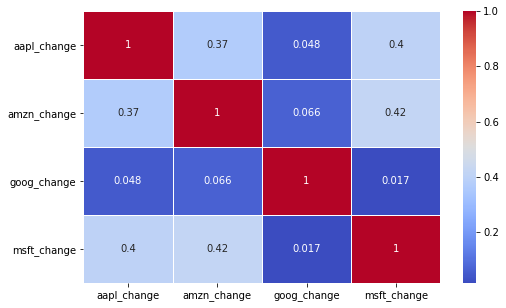

In [74]:
#create heatmap chart to see the correlation
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5)

conclusion:
<p>The correlation coefficient between microsoft and amazon is 0.42 (moderate positive relationship ). If the correlation coefficient is 0,it has no relationship.</p>

#### Value at Risk Analysis for Tech Companies

c:\Users\HP\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='aapl_change', ylabel='Density'>

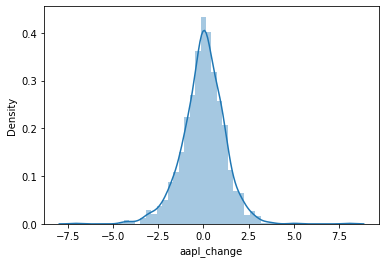

In [127]:
sns.distplot(data['aapl_change'])

In [128]:
#standar deviation
data['aapl_change'].std() #close one point 

1.1871377131421237

In [129]:
#
data['aapl_change'].std()*2


2.3742754262842474

In [131]:
data['aapl_change'].quantile(0.1)

-1.4246644227944307

In [130]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
aapl_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
amzn_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
goog_change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
msft_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
